In [3]:
# Explorartory Data Analysis: ASHRAE - Great Energy Predictor

# Need to create a plan of how to explore each dataset

# Data Quality - Python Pandas Profiling
# Stats Summary of each column
# Explore shape of data -- Swarm plot -- Doesn't the pair plot already do this?
# Time series charts
# - Buildings by Energy Usage
# - Type of Energy by Energy Usage -- Do time series
# Joined dataset - Look at matrix plot to see relationsips, scatter plots etc.
# - Need to aggregate data first in order to do this!
# Cluster analysis to see which groups of buildings are the most similar - This will put each building into a group, 
# we can then use this as another potential predictor, but will need to see relationship between energy usage and group (swarm plot) 
# Based on k means, hierarchical clustering, biplot

pd.__version__

'0.25.3'

In [1]:
# Importing

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy.stats import pearsonr
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# Changing working directory:

os.chdir('C:/Users/SI069770/Documents/Kaggle/ashrae-energy-prediction')

In [3]:
Train_dataset = pd.read_csv('train.csv')

In [4]:
Train_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        object
meter_reading    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [5]:
# Converting to date format:

Train_dataset['timestamp'] = pd.to_datetime(Train_dataset['timestamp'])


C:\Users\SI069770\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


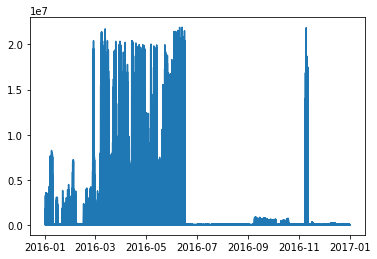

In [6]:
# Trend of energy usage

plt.plot(Train_dataset['timestamp'], Train_dataset['meter_reading'])
plt.show()

In [7]:
Train_dataset.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


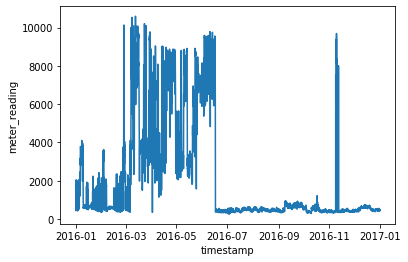

In [8]:
# Unsure what this is showing

sns.lineplot(data=Train_dataset, x='timestamp',y='meter_reading', ci=None)

In [9]:
# Need to take sample of data to understand it
# Filtering for one building

Train_dataset[Train_dataset['building_id'] == 3]

,building_id,meter,timestamp,meter_reading
3,3,0,2016-01-01 00:00:00,0.000
2304,3,0,2016-01-01 01:00:00,0.000
4597,3,0,2016-01-01 02:00:00,0.000
6896,3,0,2016-01-01 03:00:00,0.000
9192,3,0,2016-01-01 04:00:00,0.000
...,...,...,...,...
20204277,3,0,2016-12-31 19:00:00,107.162
20206640,3,0,2016-12-31 20:00:00,107.162
20209006,3,0,2016-12-31 21:00:00,106.821
20211371,3,0,2016-12-31 22:00:00,104.090


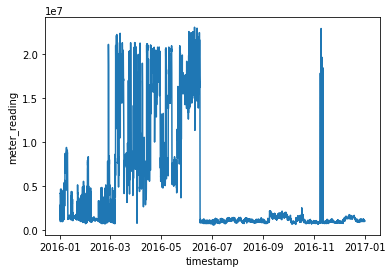

In [10]:
# Group by timestamp then sum energy:

Train_dataset_byday_time = Train_dataset.groupby('timestamp').meter_reading.sum().reset_index()
sns.lineplot(data=Train_dataset_byday_time, x='timestamp',y='meter_reading', ci=None)

# Points of interest

# Large amounts of energy was used from Jan 2016 to approx June 2016
# Data is for Jan 2016 to Jan 2017, approx 13 months
# Large spike in Nov 2016

In [12]:
# Grouping data by building and time then summing energy usage:

Train_dataset_bybuild_time = Train_dataset.groupby(['building_id','timestamp']).meter_reading.sum().reset_index()
Train_dataset_bybuild_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12393999 entries, 0 to 12393998
Data columns (total 3 columns):
building_id      int64
timestamp        datetime64[ns]
meter_reading    float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 283.7 MB


In [ ]:
# Need to aggregate this data further as it is too large!
# Use the resample method to aggregate at different levels e.g. Month, week, day
# Then attempt to use the hue argument
# The large spike obeserved above may just be one building... (outlier, erroneous data???)

In [13]:
Train_dataset_bybuild_time.set_index('timestamp', inplace=True)

In [14]:
Train_dataset_bybuild_time.head()

,building_id,meter_reading
timestamp,,
2016-01-01 00:00:00,0,0.0
2016-01-01 01:00:00,0,0.0
2016-01-01 02:00:00,0,0.0
2016-01-01 03:00:00,0,0.0
2016-01-01 04:00:00,0,0.0


In [15]:
# Aggregating data by weekly energy usage by each building (resample does not work here, use Grouper function):

weekly_building_summary = pd.DataFrame()

weekly_building_summary = Train_dataset.groupby(['building_id', pd.Grouper(key='timestamp', freq='W')])['meter_reading'].sum()

# Ref: https://pbpython.com/pandas-grouper-agg.html

weekly_building_summary = weekly_building_summary.reset_index()
weekly_building_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75318 entries, 0 to 75317
Data columns (total 3 columns):
building_id      75318 non-null int64
timestamp        75318 non-null datetime64[ns]
meter_reading    75318 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.7 MB


In [17]:
weekly_building_summary.head()

,building_id,timestamp,meter_reading
0,0,2016-01-03,0.0000
1,0,2016-01-10,0.0000
2,0,2016-01-17,0.0000
3,0,2016-01-24,0.0000
4,0,2016-01-31,133.7818


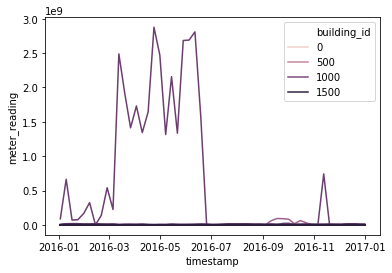

In [18]:
# Plotting weekly energy usage by building trends:

sns.lineplot(data=weekly_building_summary, x='timestamp',y='meter_reading', ci=None, hue='building_id')
# Why all categories do not show??

In [19]:
Train_dataset['building_id'].unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   49,   50,   51,   52,   53,   54,   55,   56,
         57,   58,   59,   60,   61,   62,   63,   64,   65,   66,   67,
         68,   69,   70,   71,   72,   73,   74,   75,   76,   77,   78,
         79,   80,   81,   82,   83,   84,   85,   86,   87,   88,   89,
         90,   91,   92,   93,   94,   95,   96,   97,   98,   99,  100,
        101,  102,  103,  104,  105,  106,  107,  108,  109,  110,  111,
        112,  113,  114,  115,  116,  117,  118,  119,  120,  121,  122,
        123,  124,  125,  126,  127,  128,  129,  130,  131,  132,  133,
        134,  135,  136,  137,  138,  139,  140,  141,  142,  143,  144,
        145,  146,  147,  148,  149,  150,  151,  1

In [20]:
# Checking buildings by their highest recorded energy recorded in a week

# Show each building by max weekly energy usage

Train_dataset_bybuild_max = weekly_building_summary.groupby(['building_id']).meter_reading.max().reset_index()
Train_dataset_bybuild_max['building_id'] = Train_dataset_bybuild_max['building_id'].astype('category')

Train_dataset_bybuild_max.sort_values('meter_reading')

# Remove the top energy users and replot

,building_id,meter_reading
740,740,6.720000e-02
637,637,4.246750e+01
636,636,4.937500e+01
817,817,6.000000e+01
634,634,7.342500e+01
...,...,...
1168,1168,1.758372e+07
1197,1197,1.939491e+07
1088,1088,2.432142e+07
778,778,9.321531e+07


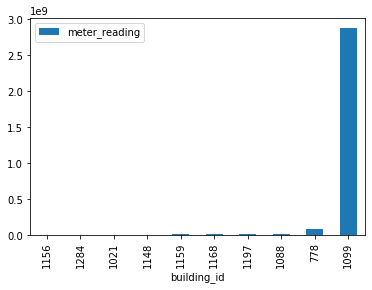

In [45]:
# Selecting top 10 building with highest energy users in a week:

Top_10_week = Train_dataset_bybuild_max.sort_values('meter_reading').iloc[-10:]

# Plotting bar chart of top 10 energy buildings:

Top_10_week.plot(kind='bar',x='building_id',y='meter_reading')

plt.show()

# This clearly shows buildings 778 and 1099 have the highest weekly enegy usage and are 
# therefore correlate to the same buildings that are causing the unusually high trends 
# in energy use seen in the time series previously.

In [46]:
# Remove the highest weekly energy users and plot graph again:
# 778, 1099
mask = weekly_building_summary['building_id'].isin([778, 1099])

weekly_building_summary_v1 = weekly_building_summary[~mask]


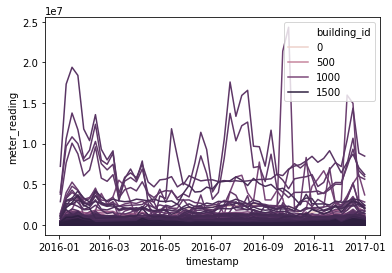

In [47]:
# Plotting time series without the two extornially high energy users:

sns.lineplot(data=weekly_building_summary_v1, x='timestamp',y='meter_reading', ci=None, hue='building_id')

In [48]:
weekly_building_summary_v1

,building_id,timestamp,meter_reading
0,0,2016-01-03,0.0000
1,0,2016-01-10,0.0000
2,0,2016-01-17,0.0000
3,0,2016-01-24,0.0000
4,0,2016-01-31,133.7818
...,...,...,...
75313,1448,2016-12-04,324.4500
75314,1448,2016-12-11,475.1000
75315,1448,2016-12-18,621.1250
75316,1448,2016-12-25,621.8750


In [ ]:
# - Type of Energy by Energy Usage





In [49]:
# Import Building metadata and Weather 

Building_metadata = pd.read_csv('building_metadata.csv')

Weather_train_data = pd.read_csv('weather_train.csv')

# Converting to date format

Weather_train_data['timestamp'] = pd.to_datetime(Weather_train_data['timestamp'])

# Join datasets

Train_dataset_v2 = pd.merge(Train_dataset, Building_metadata, left_on='building_id', right_on='building_id', how='left')

# Need to join weather_train on both site_id and time

Train_dataset_v3 = pd.merge(Train_dataset_v2, Weather_train_data, left_on=['site_id', 'timestamp'], right_on=['site_id', 'timestamp'], how='left')

# Need to aggregate data further, perhaps weekly total energy usage


In [50]:
Train_dataset_v3.info()

# Planning how to aggregate the data:

## Categorical

# site_id
# building_id
# meter
# primary_use


## Numeric - Operation

# meter_reading - sum
# square_feet - max
# year_built - max
# floor_count - max
# air_temperature - avg
# cloud_coverage - avg
# dew_temperature - avg
# precip_depth_1_hr - avg
# sea_level_pressure - avg
# wind_direction - avg
# wind_speed - avg

# sns.pairplot(Train_dataset_v3)

# 20216100

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
building_id           int64
meter                 int64
timestamp             datetime64[ns]
meter_reading         float64
site_id               int64
primary_use           object
square_feet           int64
year_built            float64
floor_count           float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtypes: datetime64[ns](1), float64(10), int64(4), object(1)
memory usage: 2.6+ GB


In [51]:
# Grouping by categorical fields, resample weekly (using grouper function) and aggregate relevant numerical columns 
# using .agg function():

weekly_build_meter_summary = pd.DataFrame()

weekly_build_meter_summary = Train_dataset_v3.groupby(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built', 'floor_count', 'meter', pd.Grouper(key='timestamp', freq='W')]).agg(
    total_meter_reading = pd.NamedAgg(column='meter_reading', aggfunc=sum),
    mean_air_temperature=pd.NamedAgg(column='air_temperature', aggfunc='mean'),
    mean_cloud_coverage=pd.NamedAgg(column='cloud_coverage', aggfunc='mean'),
    mean_dew_temperature=pd.NamedAgg(column='dew_temperature', aggfunc='mean'),
    mean_precip_depth_1_hr=pd.NamedAgg(column='precip_depth_1_hr', aggfunc='mean'),
    mean_sea_level_pressure=pd.NamedAgg(column='sea_level_pressure', aggfunc='mean'),
    mean_wind_direction=pd.NamedAgg(column='wind_direction', aggfunc='mean'),
    mean_wind_speed=pd.NamedAgg(column='wind_speed', aggfunc='mean')
)

# weekly_build_meter_summary = weekly_build_meter_summary.reset_index()

weekly_build_meter_summary = weekly_build_meter_summary.reset_index()
weekly_build_meter_summary



,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,total_meter_reading,mean_air_temperature,mean_cloud_coverage,mean_dew_temperature,mean_precip_depth_1_hr,mean_sea_level_pressure,mean_wind_direction,mean_wind_speed
0,1,107,Education,97532,2005.0,10.0,0,2016-01-03,25291.993,7.708333,0.0,6.583333,NaN,1002.288889,157.083333,5.781944
1,1,107,Education,97532,2005.0,10.0,0,2016-01-10,63634.164,7.141071,0.0,5.613690,NaN,989.296407,187.738095,4.260119
2,1,107,Education,97532,2005.0,10.0,0,2016-01-17,66492.744,3.916071,0.0,1.394643,NaN,1010.888485,240.178571,4.619048
3,1,107,Education,97532,2005.0,10.0,0,2016-01-24,68578.000,4.888095,0.0,2.678571,NaN,1020.909524,180.595238,3.360714
4,1,107,Education,97532,2005.0,10.0,0,2016-01-31,68991.000,9.437500,0.0,6.870238,NaN,1015.143713,221.904762,7.485714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13703,7,803,Education,182986,1962.0,3.0,2,2016-12-04,249060.700,1.635714,NaN,-1.089697,16.352941,1011.977381,196.190476,4.246429
13704,7,803,Education,182986,1962.0,3.0,2,2016-12-11,279467.810,-3.731138,NaN,-6.378443,4.750000,1018.210778,198.323353,3.339521
13705,7,803,Education,182986,1962.0,3.0,2,2016-12-18,330890.900,-9.515528,NaN,-12.556522,5.622222,1013.683230,186.149068,3.967702
13706,7,803,Education,182986,1962.0,3.0,2,2016-12-25,301368.940,-4.551515,NaN,-7.698788,6.153846,1023.771515,216.909091,3.351515


In [21]:
### Validation of aggregated dataset: weekly_build_meter_summary

# Selecting Building_id = 107 at week end timestamp = 2016-01-10 to validate against unaggregated data source

weekly_build_meter_summary.loc[(weekly_build_meter_summary["building_id"] == 107) & (weekly_build_meter_summary["timestamp"] == '2016-01-10')]


,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,total_meter_reading,mean_air_temperature,mean_cloud_coverage,mean_dew_temperature,mean_precip_depth_1_hr,mean_sea_level_pressure,mean_wind_direction,mean_wind_speed
1,1,107,Education,97532,2005.0,10.0,0,2016-01-10,63634.164,7.141071,0.0,5.61369,NaN,989.296407,187.738095,4.260119


In [41]:
# Selecting building 107 at week ending 2016-01-10

Train_dataset_build_107 = Train_dataset_v3.loc[(Train_dataset_v3["building_id"] == 107) & (Train_dataset_v3["timestamp"] < '2016-01-11') & (Train_dataset_v3["timestamp"] > '2016-01-03 23:00:00')]

# Checking meter_reading:
# Train_dataset_build_107['meter_reading'].sum() 

# Checking air_temperature:
# Train_dataset_build_107['air_temperature'].mean()

# Checking cloud_coverage:
# Train_dataset_build_107['cloud_coverage'].mean()

# Checking wind_direction:
Train_dataset_build_107['wind_direction'].mean()

#### Validation Complete

187.73809523809524

In [38]:
Train_dataset.loc[(Train_dataset["building_id"] == 107)]['meter'].unique()


array([0], dtype=int64)

C:\Users\SI069770\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\SI069770\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


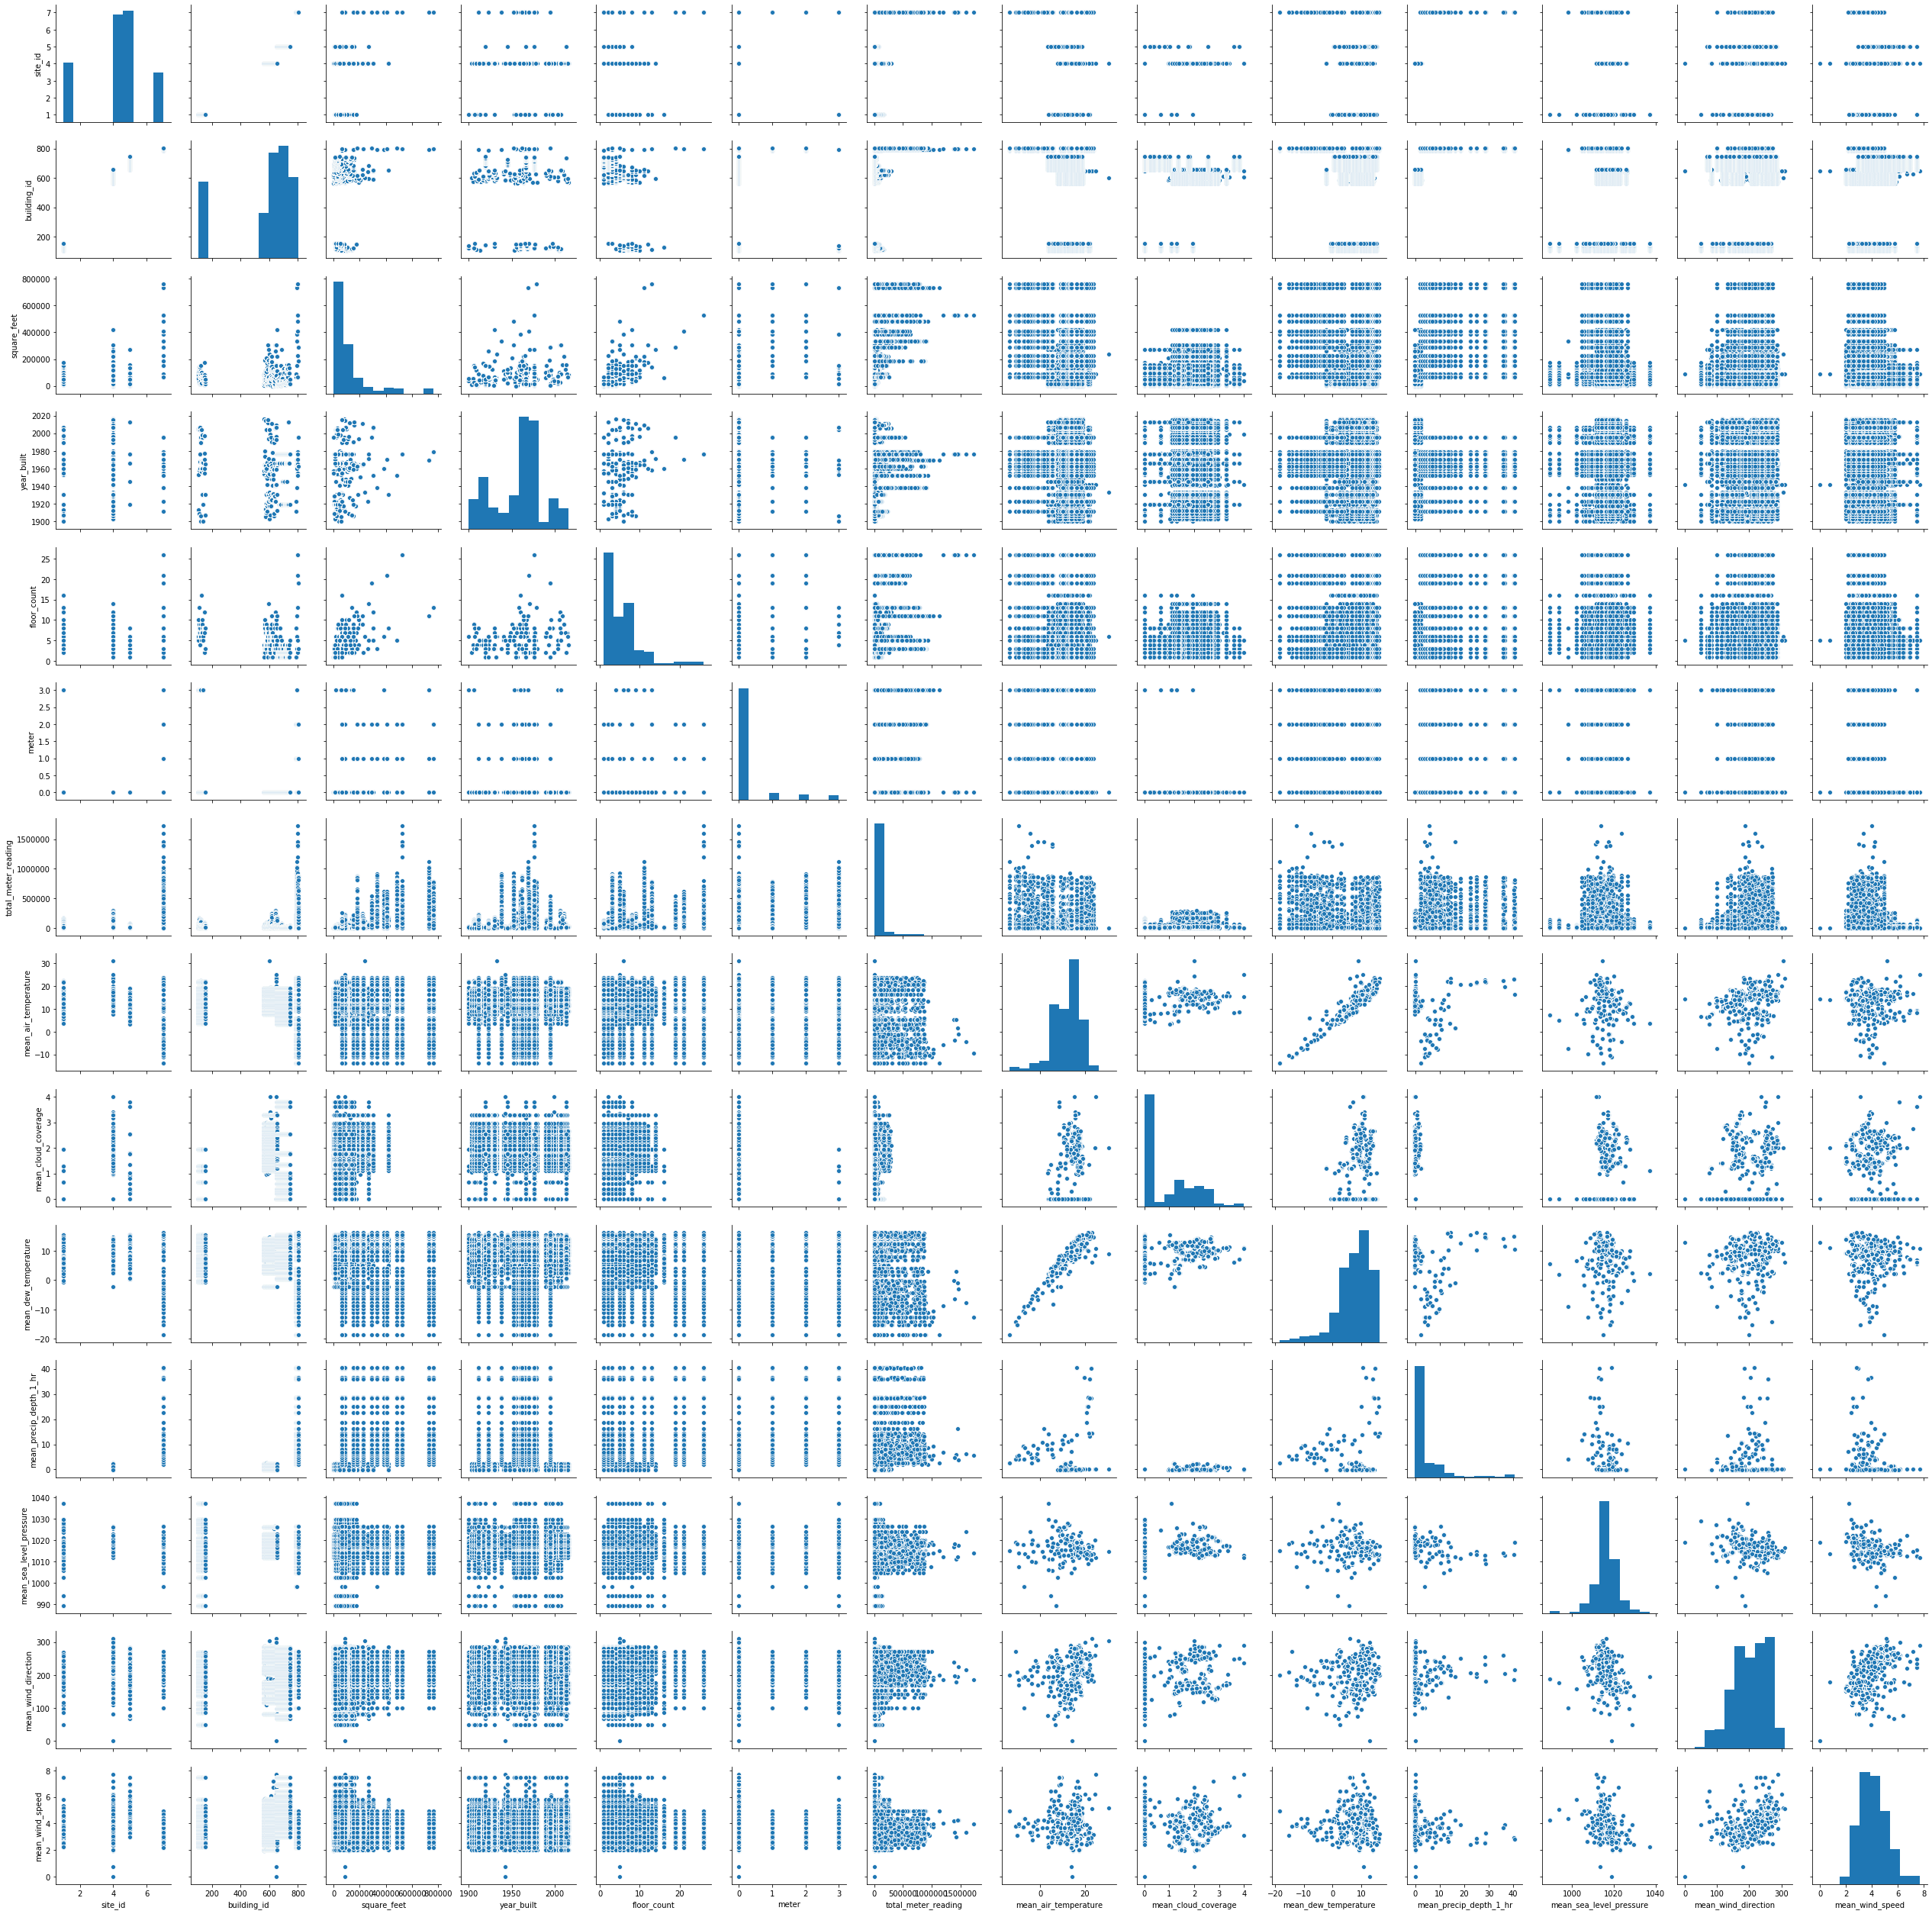

In [52]:
pairplot_download = sns.pairplot(weekly_build_meter_summary)

# Test pariplot with small subset of data

In [46]:
pairplot_download.savefig("Energy_pairplot.png")

In [53]:
# Creating function to calculate pearson correlation coefficient

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
 

In [54]:
# Replacing inf with nan
weekly_build_meter_summary = weekly_build_meter_summary.replace([np.inf, -np.inf], np.nan)

# Replacing nan with 0
weekly_build_meter_summary.fillna(0, inplace=True)
weekly_build_meter_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13708 entries, 0 to 13707
Data columns (total 16 columns):
site_id                    13708 non-null int64
building_id                13708 non-null int64
primary_use                13708 non-null object
square_feet                13708 non-null int64
year_built                 13708 non-null float64
floor_count                13708 non-null float64
meter                      13708 non-null int64
timestamp                  13708 non-null datetime64[ns]
total_meter_reading        13708 non-null float64
mean_air_temperature       13708 non-null float64
mean_cloud_coverage        13708 non-null float64
mean_dew_temperature       13708 non-null float64
mean_precip_depth_1_hr     13708 non-null float64
mean_sea_level_pressure    13708 non-null float64
mean_wind_direction        13708 non-null float64
mean_wind_speed            13708 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(4), object(1)
memory usage: 1.7+ MB


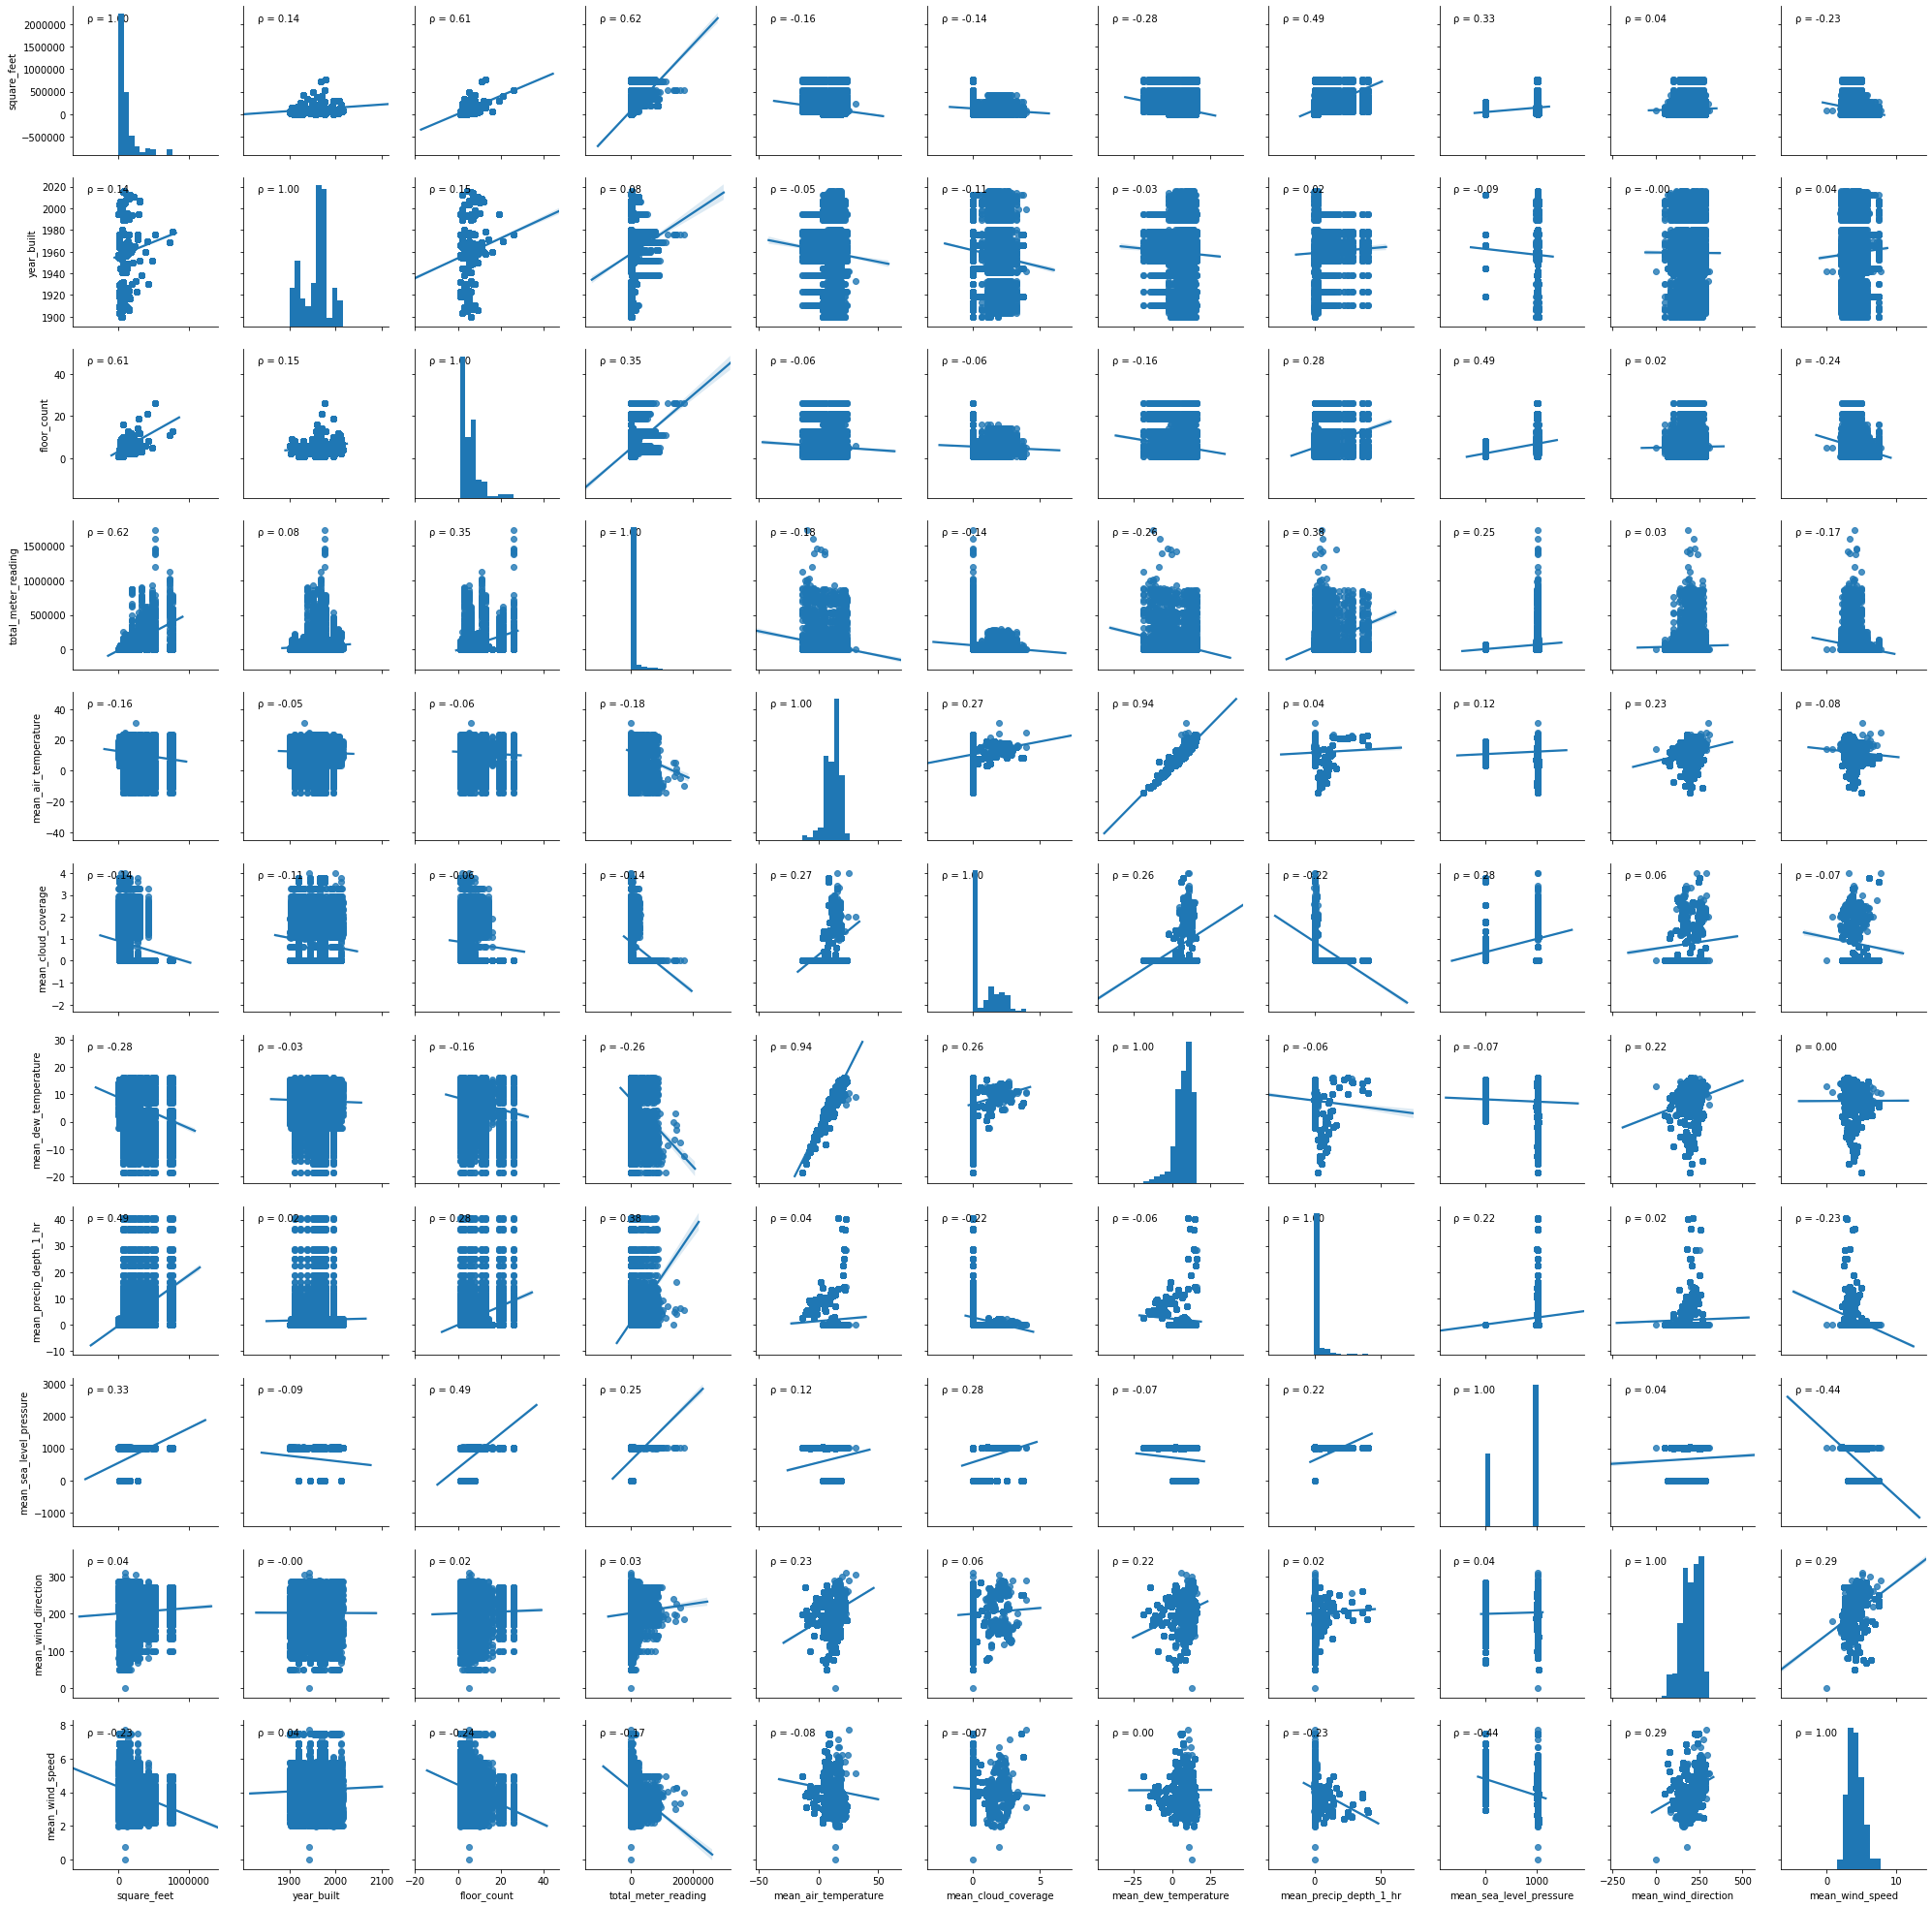

In [57]:
g = sns.pairplot(weekly_build_meter_summary, vars=['square_feet', 'year_built', 'floor_count', 'total_meter_reading', 'mean_air_temperature', 'mean_cloud_coverage', 'mean_dew_temperature', 'mean_precip_depth_1_hr', 'mean_sea_level_pressure', 'mean_wind_direction', 'mean_wind_speed'], kind="reg")
pairplot_g = g.map(corrfunc)


In [58]:
pairplot_g.savefig("Energy_pairplot.png")


In [ ]:
# Analyzing pair plot to identify the best predictors of energy usage

### Observations 

# No noticeable correlations between weekly energy usage across all energy types

# Investigate: Do pairplot by energy type. e.g. filter or do as hue